# DTSA-5509,  Final: Used car price prediction
### October 2, 2023


This jupyter notebok is uploaded to https://github.com/daisukexp/dtsa5509_final

In [594]:
import sys
import platform
import os
import warnings

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = Warning)

In [479]:
sys.version

'3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]'

# Step 1 : Gather data, determine the method of data collection and provenance of the data

### Introduction
In this final project, I was looking for a theme something realated to my life or hobbies. I am working on automotive industry and I change cars every 2 to 3 years for enjyoing latest car technology with the latest car models. After several research, I decided to choose the used car price detecion,  reason why I choose this dataset because resale value is important if selling a car and purchasing new one, analyzing factors to selling at higher price is interesting!

### About Dataset

The dataset is provided by Kaggle, "Used Car Auction Prices" as shown in below link.

https://www.kaggle.com/code/desalegngeb/auctioning-used-cars-what-matters-most

The dataset contains historical car auction sales prices, scraped from the outside internet sources. The dataset has been collected in 2015, and will not be updated.

# Step 2 : Identify a Supervised Machine Learning Problem

### Problem Definition
We define our problem as predicting the selling price of used cars, utilizing various features available in the dataset, such as make, model, year, and condition, among others. This problem is fundamentally a supervised machine learning task, as the target variable is the selling price.

### Approach & Methodology
Our methodology diverges from existing solutions available on platforms like Kaggle, which often focus primarily on visualizing the dataset's trends. Instead, our approach is multifaceted and includes the following elements,

- Build Multiple Models:
We intend to construct and experiment with various supervised learning models. Our goal is to meticulously evaluate their performance in predicting used car prices and compare the results to select the most efficacious model.

- Analysis:
Our analysis is comprehensive and examines multiple aspects. In this project, we place a substantial emphasis on computing efficiency in building the model, in addition to prioritizing model accuracy. This dual focus ensures that our model is not only accurate but also optimized for performance, providing a balanced and innovative approach to solving the problem at hand.


# Step 3 : Exploratory Data Analysis(EDA) - Inspect, Visualize and Clean the Data


### Initial inspection  and cleaning

In [480]:
# Load the dataset, some of columns have ',' in the field such as "ford motor credit company,llc" and make this corrupted row.
# The number of bad columns is small, so skip it.
df_car_prices = pd.read_csv('data/car_prices.csv', on_bad_lines='skip')

In [481]:
df_car_prices.shape

(558811, 16)

In [482]:
df_car_prices.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [483]:
df_car_prices.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Remove columns if crucial factors are absent. Since the dataset has numerous entries, removing these rows does not cause an issue.

In [484]:
df_car_prices = df_car_prices.dropna() 

Remove unnecessary columns that are not relevant to determining used car prices.

In [485]:
df_car_prices = df_car_prices.drop(['vin', 'state', 'mmr', 'seller'], axis=1)

Replace 'saledate' with 'age' and some data normalization.

In [486]:
df_car_prices['saledate'] = pd.to_datetime(df_car_prices['saledate'], utc=True, errors='coerce')
df_car_prices['age'] = df_car_prices['saledate'].dt.year - df_car_prices['year'] + 1
df_car_prices = df_car_prices.drop(columns=['saledate']) 

In [487]:
df_car_prices['body'] = df_car_prices['body'].str.lower()
df_car_prices['color'] = df_car_prices['color'].str.lower()
df_car_prices['interior'] = df_car_prices['interior'].str.lower()

In [488]:
df_car_prices.shape

(472336, 12)

In [489]:
df_car_prices.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,sellingprice,age
0,2015,Kia,Sorento,LX,suv,automatic,5.0,16639.0,white,black,21500,0
1,2015,Kia,Sorento,LX,suv,automatic,5.0,9393.0,white,beige,21500,0
2,2014,BMW,3 Series,328i SULEV,sedan,automatic,4.5,1331.0,gray,black,30000,2
3,2015,Volvo,S60,T5,sedan,automatic,4.1,14282.0,white,black,27750,1
4,2014,BMW,6 Series Gran Coupe,650i,sedan,automatic,4.3,2641.0,gray,black,67000,1


The dataset has 472336 entries and 12 colums. We have the following data after clearning.
- year: The model years of the production. It does not match to year the car manufactured.
- make: The brand name of the car such as Ford, Nissan and Honda.
- model: The edition of the car of a specific brand such as Corrola.
- trim: The variation in the specific model
- body: The style of a car such as SUV and Sedan.
- transmission: The powertrain type, also reffers gearbox
- condition: Excellent condtion(5.0) to Severerly damaged(1.0)
- odomter: The mileage
- color: The color of exterior
- interior: The color of interior
- sellingprive: The price the car at auctions
- age: The car age

In [582]:
numerical_columns = df_car_prices.select_dtypes(include=[np.number]).columns
desc_df = df_car_prices[numerical_columns].describe()

def custom_formatting(x, decimals=1):
    if x.name in ['mean', 'std']:
        return x.round(decimals=decimals)
    else:
        return x.astype(int)

desc_df.apply(custom_formatting)

,year,condition,odometer,sellingprice,age
count,472336,472336,472336,472336,472336
mean,2010,3,66701,13690,5
std,3,0,51939,9612,3
min,1990,1,1,1,0
25%,2008,2,28137,7200,3
50%,2012,3,51084,12200,4
75%,2013,4,96589,18200,8
max,2015,5,999999,230000,26


In [491]:
df_car_prices.describe(include='object')

,make,model,trim,body,transmission,color,interior
count,472336,472336,472336,472336,472336,472336,472336
unique,53,768,1507,45,2,20,17
top,Ford,Altima,Base,sedan,automatic,black,black
freq,81014,16346,48781,211308,455974,93245,209870


### Visualize

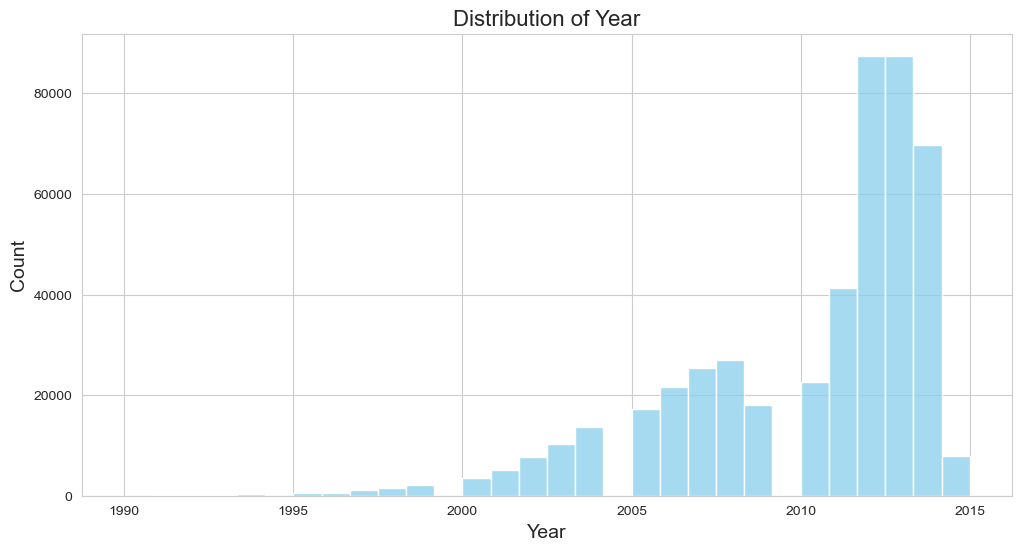

In [492]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of 'year'
plt.figure(figsize=(12,6))
sns.histplot(df_car_prices['year'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

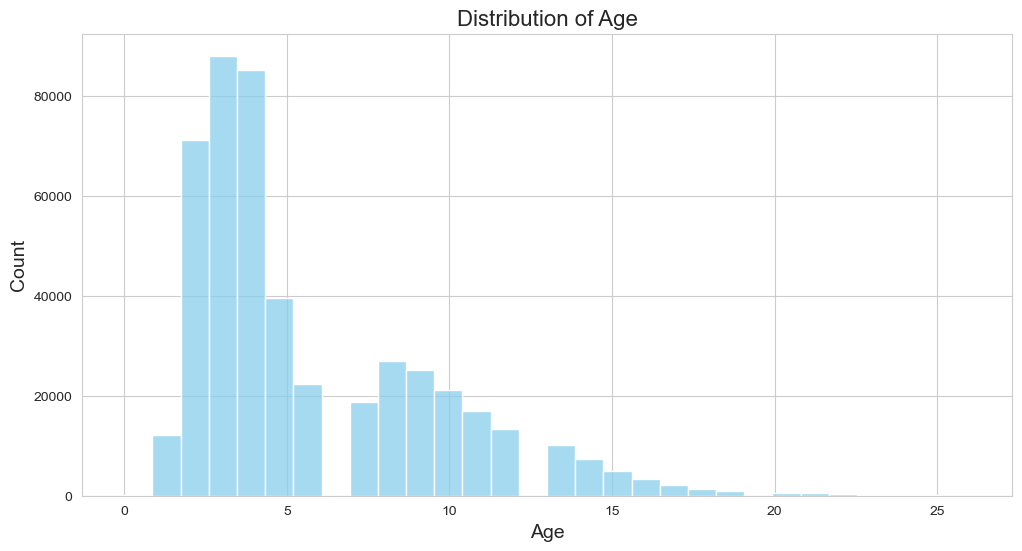

In [493]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of 'age'
plt.figure(figsize=(12,6))
sns.histplot(df_car_prices['age'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

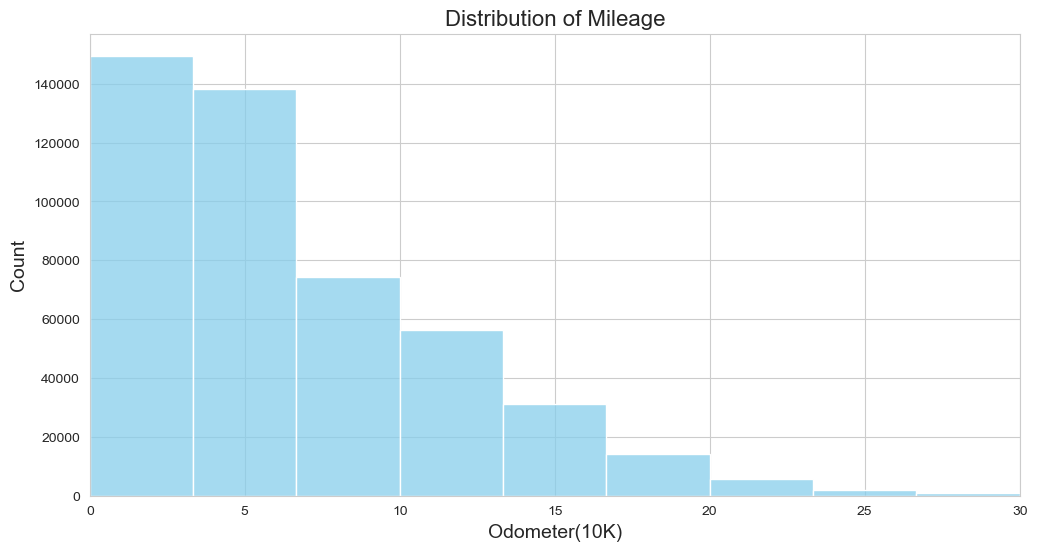

In [494]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of 'age'
plt.figure(figsize=(12,6))
sns.histplot(df_car_prices['odometer'] / 10000, bins=30, kde=False, color='skyblue')
plt.title('Distribution of Mileage', fontsize=16)
plt.xlabel('Odometer(10K)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlim(0, 30)
plt.show()

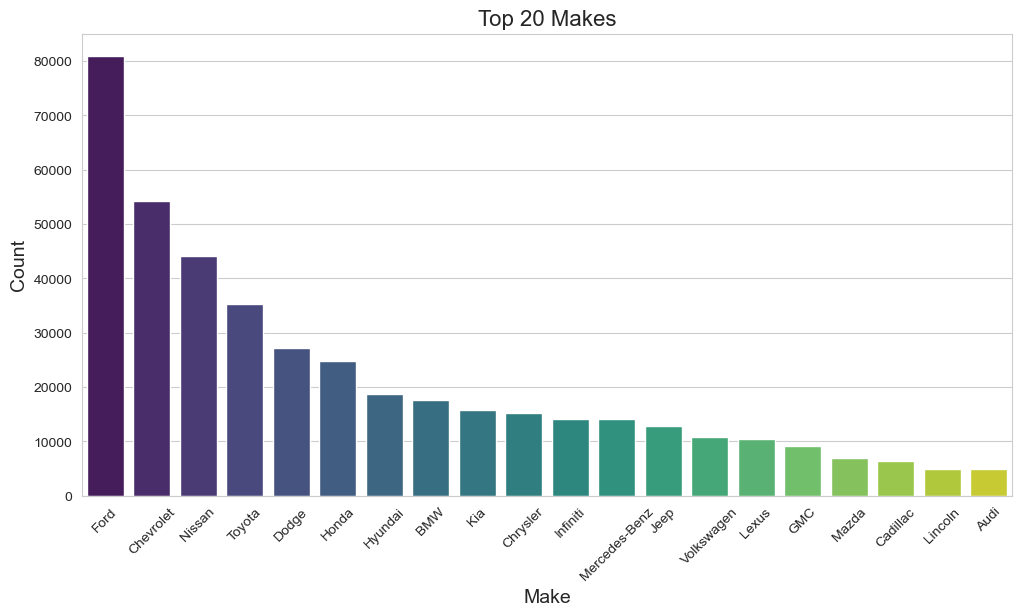

In [495]:
make_counts = df_car_prices['make'].value_counts()

# Selecting the top 20 'make'
top_make_counts = make_counts.head(20)

# Plotting the top 20 'make'
plt.figure(figsize=(12,6))
sns.barplot(x=top_make_counts.index, y=top_make_counts.values, palette='viridis')
plt.title('Top 20 Makes', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

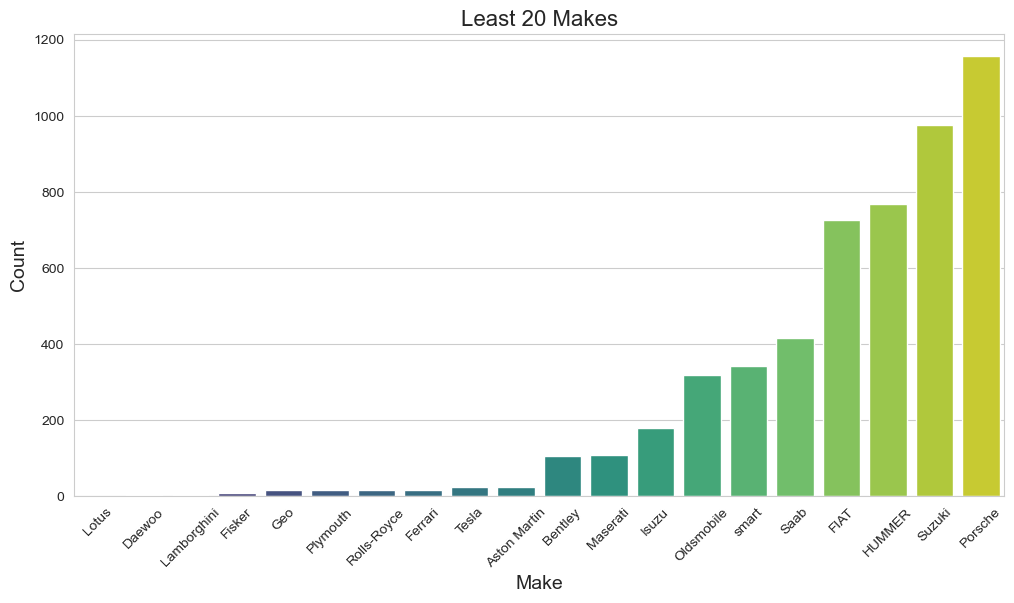

In [496]:
make_counts = df_car_prices['make'].value_counts()

# Selecting the least 20 'make'
top_make_counts = make_counts.tail(20)
top_make_counts = top_make_counts.sort_values()

# Plotting the least 20 'make'
plt.figure(figsize=(12,6))
sns.barplot(x=top_make_counts.index, y=top_make_counts.values, palette='viridis')
plt.title('Least 20 Makes', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

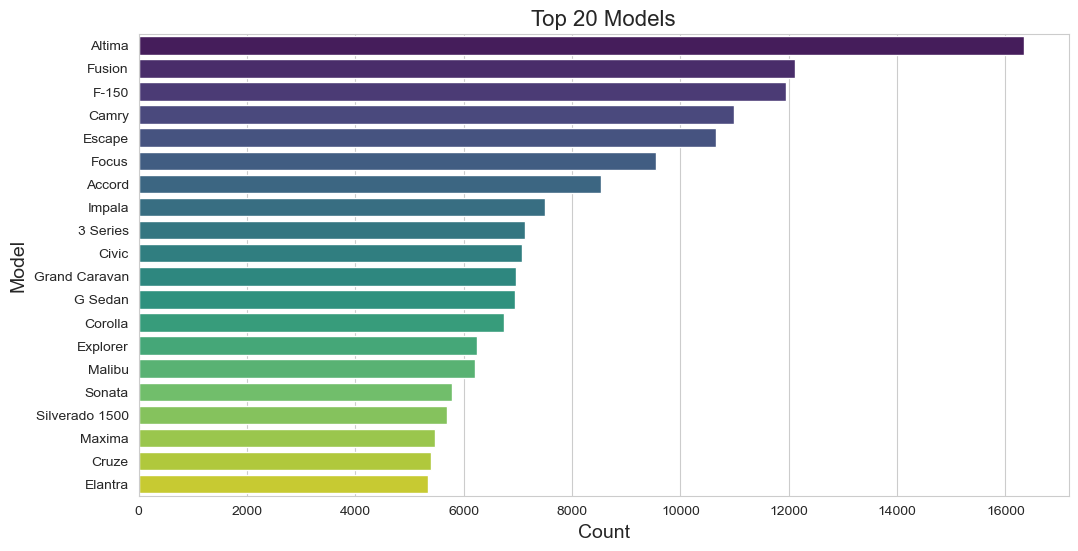

In [497]:
# Calculating the frequency of each 'model'
model_counts = df_car_prices['model'].value_counts()

# Selecting the top 20 'model'
top_model_counts = model_counts.head(20)

# Plotting the top 20 'model'
plt.figure(figsize=(12,6))
sns.barplot(x=top_model_counts.values, y=top_model_counts.index, palette='viridis')  # Note the x and y parameters
plt.title('Top 20 Models', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

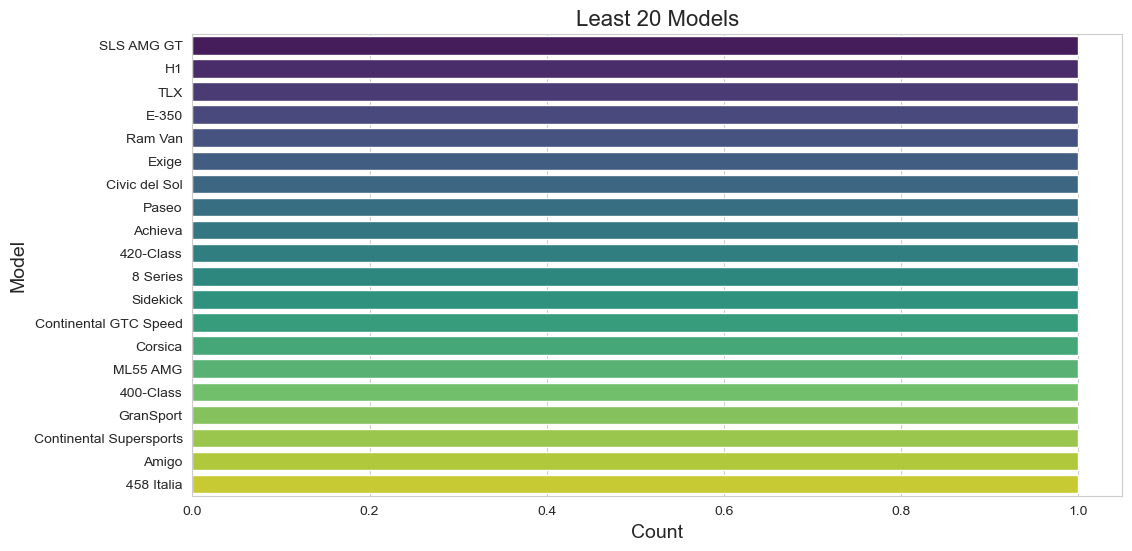

In [583]:
# Calculating the frequency of each 'model'
model_counts = df_car_prices['model'].value_counts()

# Selecting the top 20 'model'
top_model_counts = model_counts.tail(20)

# Plotting the top 20 'model'
plt.figure(figsize=(12,6))
sns.barplot(x=top_model_counts.values, y=top_model_counts.index, palette='viridis')  # Note the x and y parameters
plt.title('Least 20 Models', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

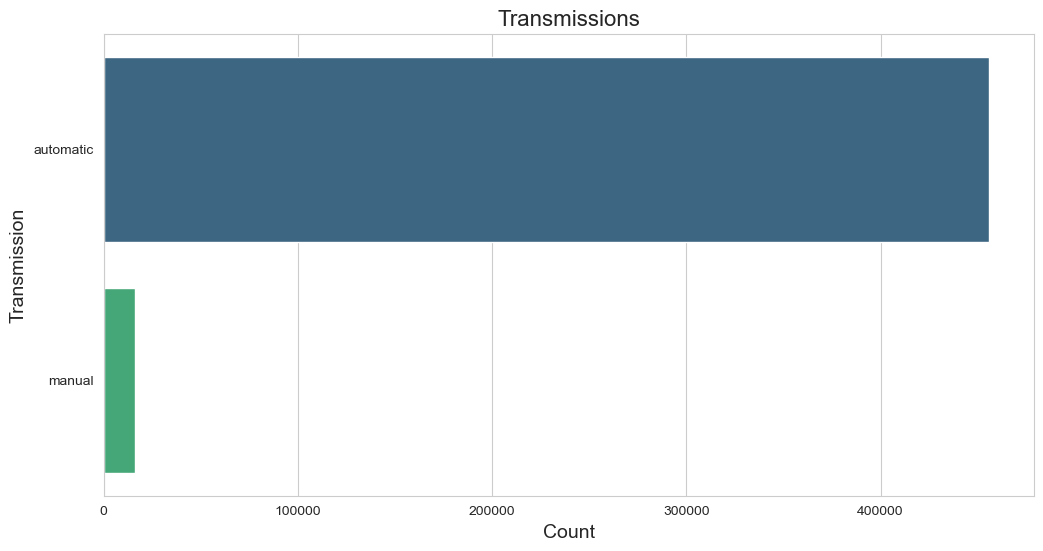

In [584]:
# Calculating the frequency of each 'model'
transmission_counts = df_car_prices['transmission'].value_counts()

# Selecting the top 5 'model'
top_transmission_counts = transmission_counts.head(5)

# Plotting the top 5 'model'
plt.figure(figsize=(12,6))
sns.barplot(x=top_transmission_counts.values, y=top_transmission_counts.index, palette='viridis')  # Note the x and y parameters
plt.title('Transmissions', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Transmission', fontsize=14)
plt.show()

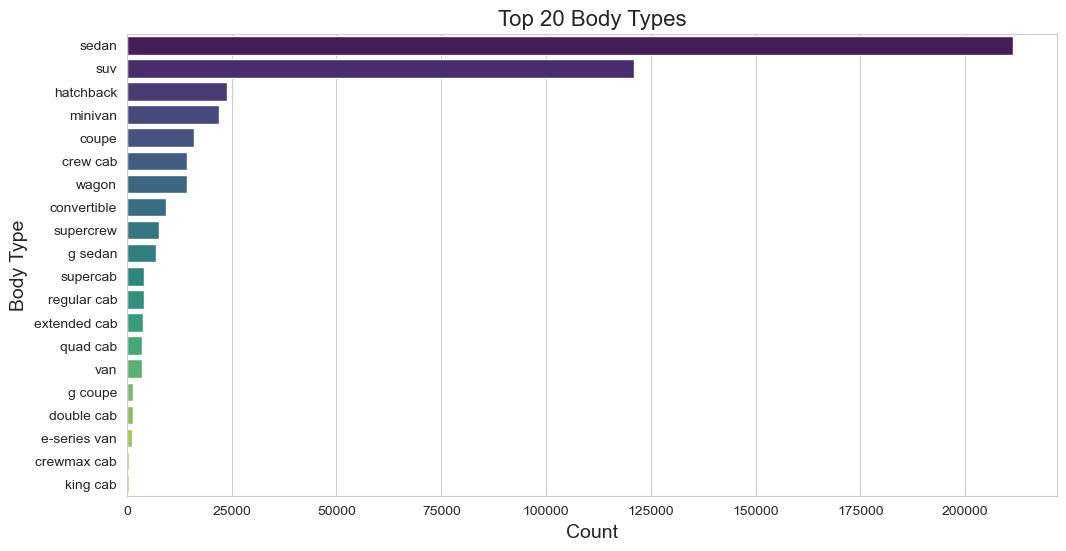

In [589]:
# Calculating the frequency of each 'model'
body_counts = df_car_prices['body'].value_counts()

# Selecting the top 20 'body'
top_body_counts = body_counts.head(20)

# Plotting the top 20 'body'
plt.figure(figsize=(12,6))
sns.barplot(x=top_body_counts.values, y=top_body_counts.index, palette='viridis')  # Note the x and y parameters
plt.title('Top 20 Body Types', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Body Type', fontsize=14)
plt.show()

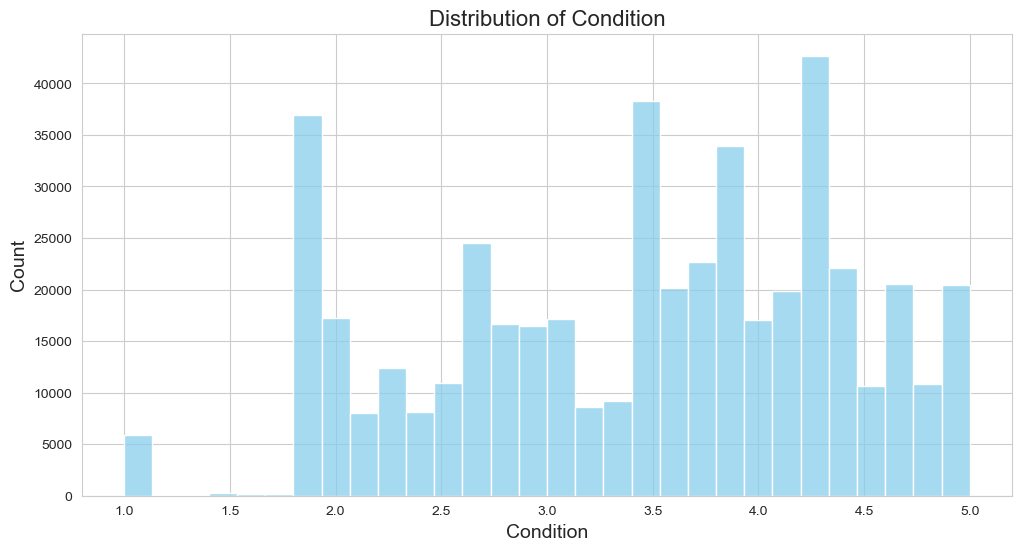

In [590]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of 'condition'
plt.figure(figsize=(12,6))
sns.histplot(df_car_prices['condition'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

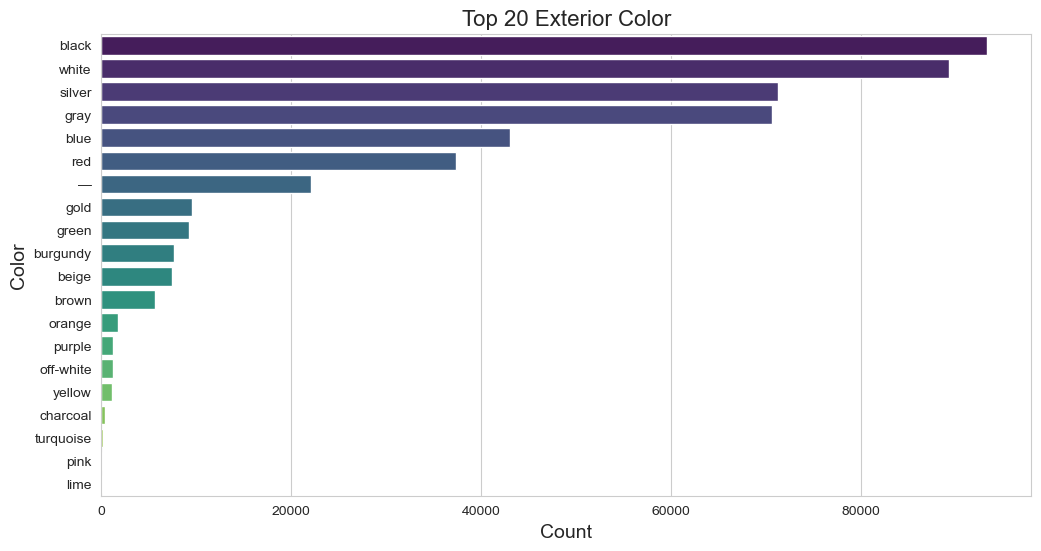

In [592]:
# Calculating the frequency of each 'exterior color'
color_counts = df_car_prices['color'].value_counts()

# Selecting the top 20 'exterior color'
top_color_counts = color_counts.head(20)

# Plotting the top 20 'exterior color'
plt.figure(figsize=(12,6))
sns.barplot(x=top_color_counts.values, y=top_color_counts.index, palette='viridis')
plt.title('Top 20 Exterior Color', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Color', fontsize=14)
plt.show()

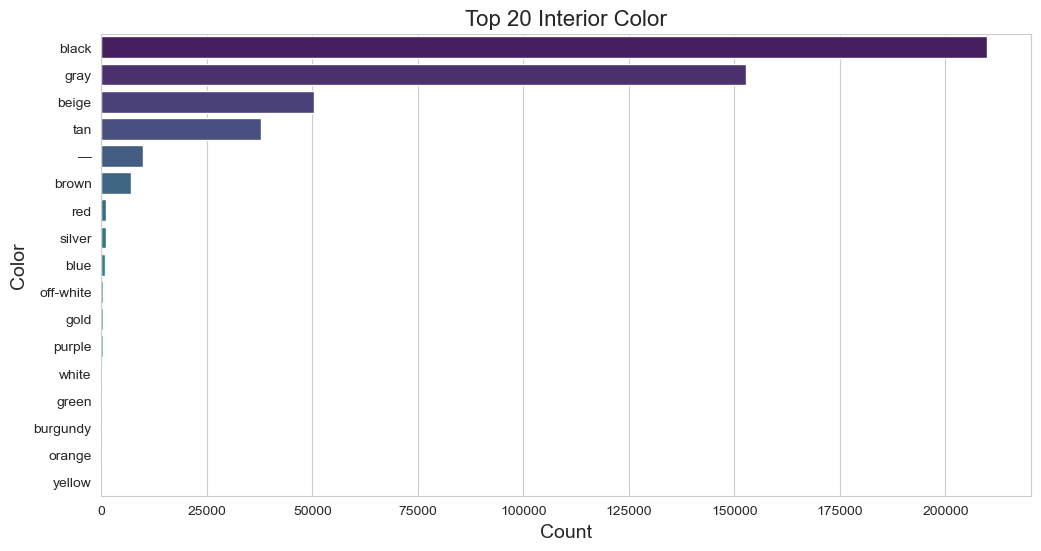

In [593]:
# Calculating the frequency of each 'interior color'
interior_counts = df_car_prices['interior'].value_counts()

# Selecting the top 20 'interior color'
top_interior_counts = interior_counts.head(20)

# Plotting the top 20 'interior color'
plt.figure(figsize=(12,6))
sns.barplot(x=top_interior_counts.values, y=top_interior_counts.index, palette='viridis')
plt.title('Top 20 Interior Color', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Color', fontsize=14)
plt.show()

# Step 4 : Perform Analysis Using Supervised Machine Learning Models of your Choice, Present Discussion and Conclusions 



## 4.1 : Model Selection

In our pursuit to develop a predictive model for used car prices, we selected two contrasting yet popular machine learning models: the Standard Linear Regression model and the Random Forest Regressor model. These models were chosen based on their suitability to handle diverse datasets and varied features, offering insights into their performance and adaptability.

### 4.1.1 Standard Linear Regression Model
The Standard Linear Regression model is a fundamental algorithm in the world of predictive modeling, primarily used to establish the linear relationship between the dependent variable (used car price) and the independent variables (features such as age, odometer, and condition). The simplicity and interpretability of Linear Regression make it an appealing choice, especially when resources are constrained. It is computationally less intensive, requiring minimal memory and CPU power, making it a go-to model for quick deployment and preliminary insights.

However, Linear Regression models assume that there is a linear relationship between the dependent and independent variables, which might not hold true for all datasets, especially those with complex, non-linear relationships and interactions between features. 

### 4.1.2 Random Forest Regressor Model
On the other hand, the Random Forest Regressor model is an ensemble learning method that is well-suited for dealing with datasets that contain categorical variables and exhibit non-linear relationships. It operates by constructing multiple decision trees during training and outputs the average prediction of the individual trees for regression tasks. Random Forests are versatile and can capture complex patterns and interactions between variables, making them a robust choice for diverse datasets.

While the Random Forest Regressor is expected to outperform the Linear Regression model due to its ability to handle non-linearities and interactions effectively, it comes with its own set of challenges. It is computationally more demanding, requiring substantial memory and CPU power, and may also take longer to train, especially with large datasets. This can be a critical consideration when deploying models in real-world, resource-constrained environments such as laptop PC environments.

### 4.1.3 Comparison and Consideration
The objective of this project is not solely focused on the predictive accuracy of the models but extends to evaluating their overall performance, including aspects such as computational efficiency, interpretability, and ease of deployment. While the Linear Regression model offers insights with less computational resources, it might not capture the intricate relationships in the data as effectively as the Random Forest Regressor. Conversely, while the Random Forest Regressor might provide more accurate predictions by leveraging its ability to model complex relationships, it may pose challenges in terms of resource consumption and deployment.

By juxtaposing these models, we aim to strike a balance between accuracy and practicality, providing a holistic view of model performance in real-world scenarios, and offering insights that can aid in informed decision-making and model selection based on the specific needs and constraints of a project.

### 4.1.4 Correlation map

The correlation map below illustrates the relationships between various factors, showcasing how one variable influences another. Focusing particularly on the selling price, it is observed that 'condition' and 'year' exhibit a positive correlation with the selling price, aligning well with real-world observations where cars in better condition and newer models tend to fetch higher prices. Conversely, 'age' and 'odometer' readings show a negative correlation with the selling price, indicating that older cars and those with higher mileage are generally priced lower, a phenomenon consistent with common market trends.

Interestingly, variables such as 'transmission', 'body', 'color', and 'interior' do not show significant correlation with the selling price. This observation is noteworthy as, intuitively, one might presume these factors to play a substantial role in determining the selling price. These attributes, often considered pivotal in consumer choice, apparently do not exhibit a clear linear relationship with the price in the used car market according to our correlation analysis.

This revelation underscores the importance of empirical analysis in assessing market dynamics and pricing strategies, highlighting that some factors, which are perceived to be influential, may not have a substantial impact on pricing when analyzed quantitatively. It prompts a reevaluation of preconceived notions and emphasizes the necessity for thorough data analysis to understand the true driving factors behind used car pricing.

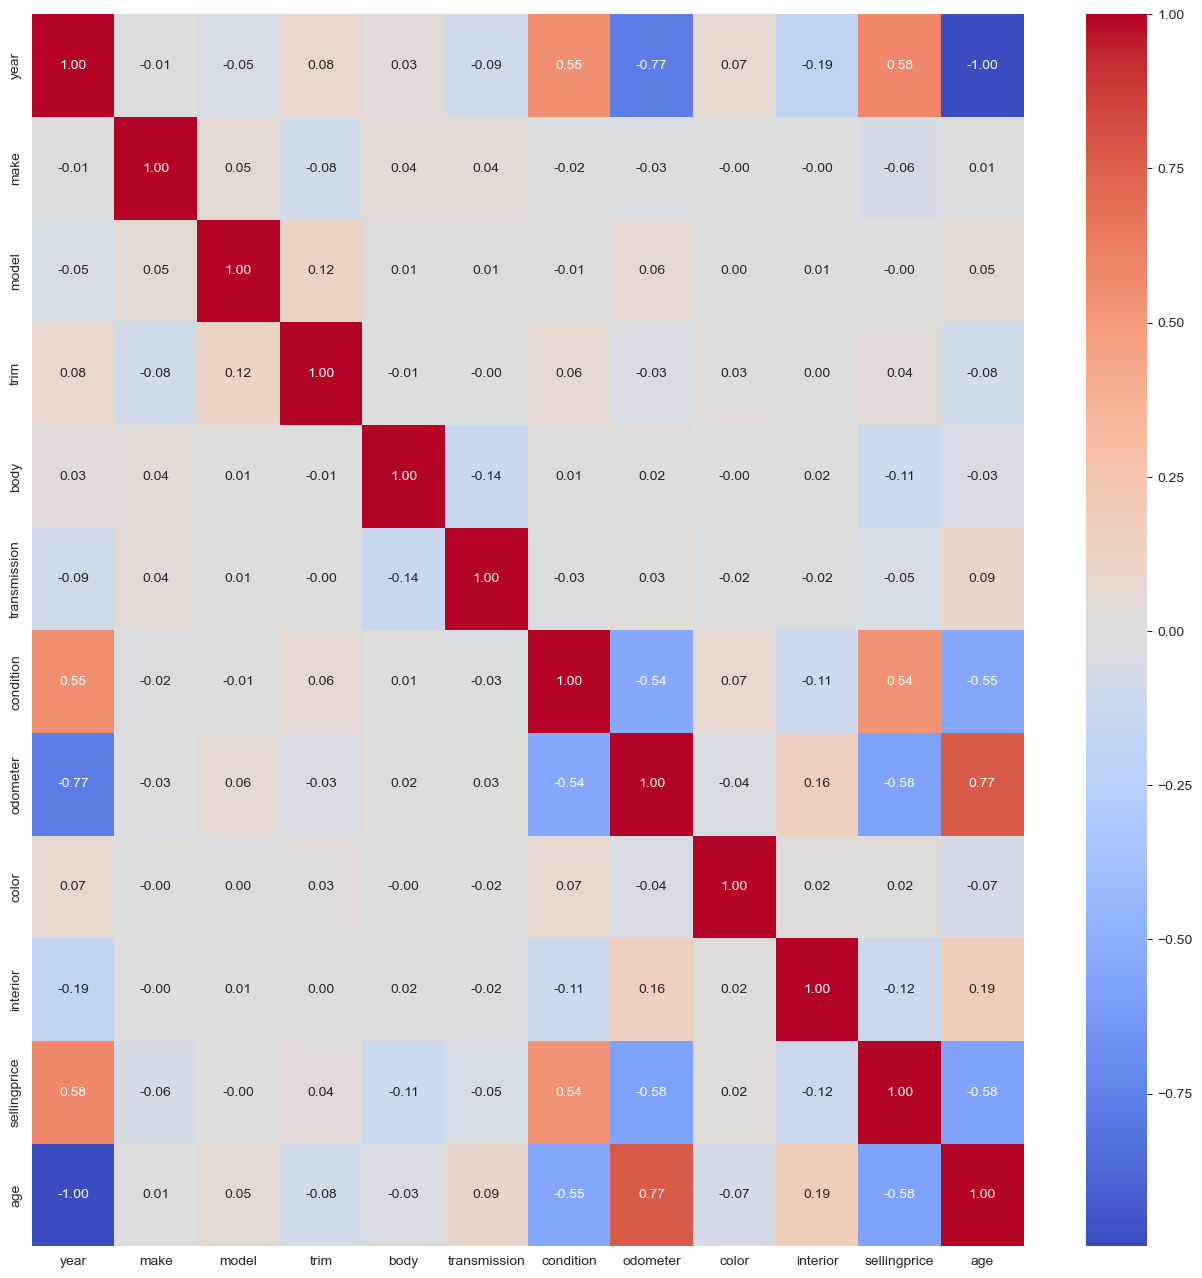

In [505]:
# instanciar encoder
lb = LabelEncoder()

df_car_prices_obj = df_car_prices.copy()
objList = df_car_prices.select_dtypes(include = "object").columns

for obj in objList:
    df_car_prices_obj[obj] = lb.fit_transform(df_car_prices_obj[obj].astype(str))
    
df_corr = df_car_prices_obj.corr()
f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={'size': 10}, ax=ax)
plt.show()

## 4.1 Liner Regression model 

In [598]:
start_time = time.time()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_car_prices_obj, columns=['color', 'make', 'model', 'trim', 'body', 'interior'])

# Define the feature set X and the target y
X = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate computing time
end_time = time.time()
elapsed_time = end_time - start_time


# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)
print(f"Time taken: {round(elapsed_time, 1)} seconds")

Mean Squared Error: 10613875.224727098
Root Mean Squared Error: 3257.8942930560374
Mean Absolute Error: 2029.4087476419445
R^2 Score: 0.8860642231053399
Time taken: 29.9 seconds


In [597]:
def plot_prediction(y_test, y_pred, number):
    actual = y_test.reset_index(drop=True).head(number)
    predicted = y_pred[:number]

    # Set up the bar positions
    bar_width = 0.35
    index = np.arange(len(actual))

    # Create the plot
    fig, ax = plt.subplots(figsize=(12,6))
    bar1 = ax.bar(index, actual, bar_width, label='Actual')
    bar2 = ax.bar(index + bar_width, predicted, bar_width, label='Predicted')

    # Adding labels, title, and custom x-axis tick labels
    ax.set_xlabel('Observation')
    ax.set_ylabel('Selling Price')
    ax.set_title('Comparison of Actual and Predicted Selling Prices')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(range(1, number + 1))
    ax.legend()

    plt.show()

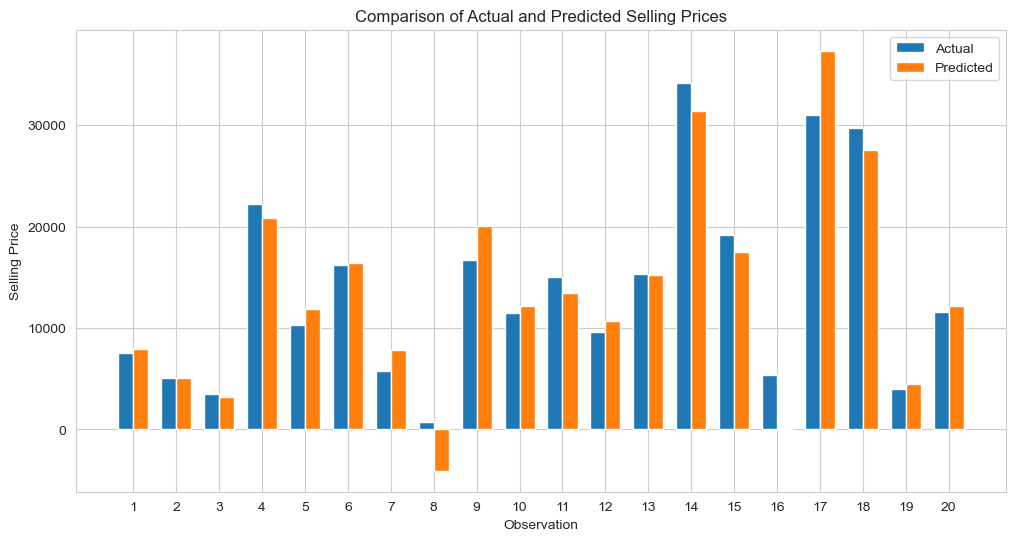

In [553]:
plot_prediction(y_test, y_pred, 20)

The metrics obtained from the linear regression model suggest a good fit to the dataset. The Mean Squared Error (MSE) is 10,613,875 and the Root Mean Squared Error (RMSE), a measure of the average magnitude of the errors, is 3,258. The Mean Absolute Error (MAE), which provides a measure of the average absolute difference between observed and predicted values, is 2,029.

The $R^2$ score is 0.886, indicating that approximately 88.6% of the variability in the selling price is explained by the model, which is a substantial level of explanatory power in the context of regression models. This high $R^2$ score indicates that the linear regression model fits the dataset well.

The selling price of 8 showcases a negative value; this seems to be induced by the negative correlation factor associated with specific variables.

## 4.2 Random Forest Regressor 

In [599]:
num_imputer = SimpleImputer(strategy='mean')

# For categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
    
# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    
# Define numerical columns and categorical columns
num_cols = ['year', 'condition', 'odometer', 'age']
cat_cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

# Build the column transformer with imputers and encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_cols),
        ('cat', Pipeline(steps=[('imputer', cat_imputer), ('onehot', encoder)]), cat_cols)
    ])

In [600]:
start_time = time.time()

# Split the Data first
X_train, X_test, y_train, y_test = train_test_split(df_car_prices.drop('sellingprice', axis=1), df_car_prices['sellingprice'], test_size=0.2, random_state=123)

# Then apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=123, n_jobs=-1)
rf_model.fit(X_train_preprocessed, y_train)

# Evaluate the Model
y_pred = rf_model.predict(X_test_preprocessed)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate computing time
end_time = time.time()
elapsed_time = end_time - start_time

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)
print(f"Time taken: {round(elapsed_time, 1)} seconds")

Mean Squared Error: 4390648.380663019
Root Mean Squared Error: 2095.38740586628
Mean Absolute Error: 1193.7186258183674
R^2 Score: 0.9528681161469953
Time taken: 616.7 seconds


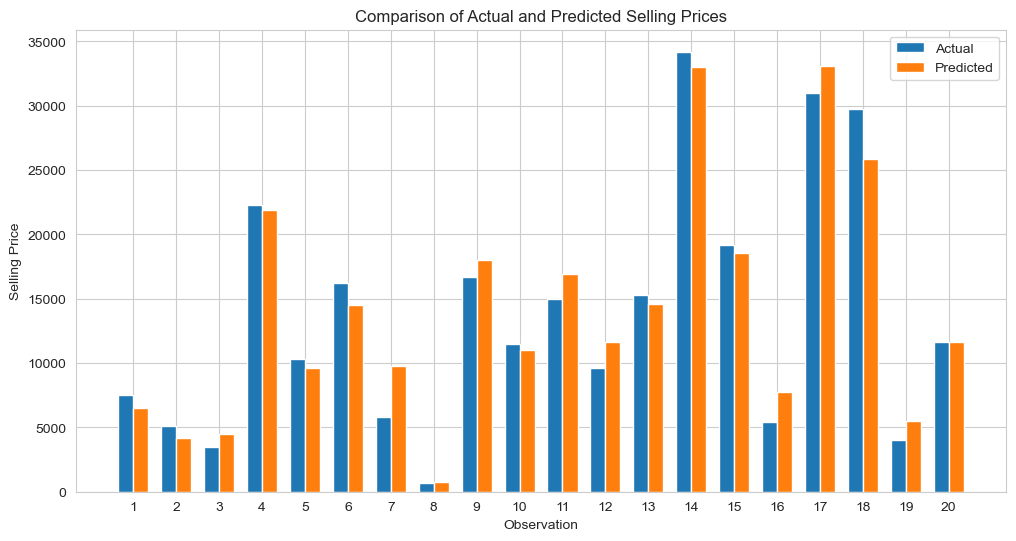

In [578]:
plot_prediction(y_test, y_pred, 20)

The Random Forest Regressor has demonstrated a substantial fit to the dataset, with metrics indicating a high degree of accuracy and precision in predicting the selling prices. Notably, the selling price of item 8, which was negative value in the linear regression model, is accurately predicted in this model.

However, it is crucial to note the computational cost associated with this enhanced accuracy and precision. The computation time for the Random Forest Regressor is significantly longer, approximately 20 times compared to the linear regression model, and it also requires a larger memory footprint. This increase in resource consumption is a crucial consideration. Balancing the trade-off between predictive accuracy and computational efficiency is essential in selecting the appropriate model for deployment, depending on the specific requirements and constraints of the task at hand.

## 4.3 Analysis

In our extensive analysis, we applied linear regression and Random Forest Regressor models to predict used car prices, considering various influencing factors like condition, model year, odometer reading, age, transmission, body, and color.

The linear regression model demonstrated substantial fitting and delivered satisfactory predictive results, with high $R^2$ scores indicating a strong correlation between the predicted and actual selling prices. However, this model showed limitations in accurately predicting certain outliers, like the selling price of item 8, highlighting the model's sensitivity to extreme values and potential lack of robustness.

Conversely, the Random Forest Regressor showcased superior fitting and predictive capabilities, accurately estimating prices, even for challenging instances like item 8. It has demonstrated resilience to outliers and variability, making it a robust choice for diverse datasets. However, this enhanced performance came at the cost of increased computational time and resource consumption, emphasizing the inherent trade-offs between accuracy and efficiency in model selection.

## 4.4 Conclusion

This project embarked on a journey to explore and predict used car prices through supervised machine learning models. Through meticulous data preprocessing, feature engineering, and model evaluation, insights into the influential factors affecting used car prices were unveiled.

The comparative analysis between the linear regression and the Random Forest Regressor models revealed the distinctive characteristics, advantages, and limitations of each. While linear regression offered a computationally efficient solution with decent accuracy, the Random Forest Regressor emerged as a more robust and precise alternative with higher computational demands.

In conclusion, the selection of an appropriate predictive model is contingent on the specific requirements, constraints, and priorities of the task. Balancing the trade-off between accuracy, robustness, and computational efficiency is pivotal in deploying effective and sustainable machine learning solutions. The insights and experiences gained from this project are invaluable in navigating the intricate landscape of machine learning and will serve as a foundation for future endeavors in predictive analytics and data science.

In this project, we constructed a model using a USA car auction dataset. While preferences vary among countries, comparing used car selling prices across different markets can reveal unique observations. For instance, the predominance of a particular transmission type in the USA, where automatic holds almost a 100% market share, and the preferences in body type and color, can unveil underlying market trends through selling car prices. Embarking on this journey has been a fascinating exploration, offering insights into the trends in the consumer preferences in automotive market.

# Reference
- https://www.kaggle.com/code/desalegngeb/auctioning-used-cars-what-matters-most
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://towardsdatascience.com/random-forest-regression-5f605132d19d